# Trying to reproduce Pt Barrow results from Piao 2008

Possible causes leading to discrepancies:
- different raw data used: origin, frequency
- different pars used in ccgcrv
- different ccgcrv code base (python vs C)
- ...?

**Raw data tests:**

Create standardized files to test for each type of raw input


### Modules

In [7]:
from matplotlib import pyplot as plt
import pandas as pd
from copy import deepcopy
from ccgcrv import ccg_dates
import numpy as np
from scipy import stats

### Load and define functions that get the ccgcrv fits

The two fucntions should do the same, i.e. fit ccg and return the results. The return format is different. get_ccgcrv has more arguments, so more options.

In [8]:
# Load get_ccgcrv function
from get_ccgcrv import ccgcrv_fit_mult
from get_ccgcrv import ccgcrv_fit_one

### Plotting function

In [9]:

def plot_piao_fig1a(ccg_y, fig1a, year_beg=1980, year_end=2002):

    from scipy import stats
    import pandas as pd
    import matplotlib.pyplot as plt

    # Prepare the data and calculate anomalies ----

    # Get the ccg data
    azc = ccg_y['tcu_doy'].loc[ccg_y['year'].between(year_beg, year_end)]
    azc.loc[azc < 150] = azc.loc[azc < 150] + 365
    years = ccg_y['year'].loc[ccg_y['year'].between(year_beg, year_end)]

    # Calculate anomalies
    azc_ano = azc - azc.mean()

    xy = pd.DataFrame({'year': years, 'azc_ano': azc_ano.to_numpy()})
    xy = pd.merge(xy,fig1a, on='year')

    reg = stats.linregress(xy['azc_ano'], xy['azc_ano_fig1a'])
    r_val = "r = {:.3f}".format(reg.rvalue)
    p_val = "p = {:.3f}".format(reg.pvalue)

    # Plot the time series
    plt.rcParams['figure.figsize'] = [8, 5]
    fig,ax=plt.subplots()
    ax.plot(years, xy['azc_ano'], '--', color='red', label='AZC anomaly')
    ax.plot(years, xy['azc_ano_fig1a'], '-', color='red', label='AZC anomaly Piao Fig1a')
    ax.set_ylabel("Autumn zero crossing anomaly (days)", color="red")
    ax.set_ylim([-15, 15])
    plt.text(0.5, 0.95, r_val+'; '+p_val, transform=ax.transAxes)
    plt.show()

In [10]:
# Define some colors
col_0 = 'aqua'
col_1 = 'teal'
col_2 = 'orchid'
col_3 = 'indigo'
col_4 = 'blue'
col_5 = 'yellowgreen'
col_6 = 'orange'
col_7 = 'olive'
col_8 = 'khaki'

### Set parameters

In [11]:
# Default parameter values as used in the ccgcrv code.
ccg_pars_def = {
    'shortterm': 80,
    'longterm': 667,
    'sampleinterval': 0,
    'numpolyterms': 3,
    'numharmonics': 4,
    'timezero': -1,
    'gap': 0,
    'use_gain_factor': False,
    'debug': False
}

# Test parameter sets

# Set sampleinterval to 1
ccg_pars_1 = deepcopy(ccg_pars_def)
ccg_pars_1['sampleinterval'] = 1


In [12]:
# Prepare raw input data

# Read in BRW data

# Naming:
# brw = Point Barrow; (method) i,f,m=insitu,flask,merge; (frequency) d,m,h,e=daily,monthly,hourly,event; 
# (origin) uk,no,sc=unkown,noaa,scripps
brw_f_m_no = pd.read_csv('../data/piao_test/brw_f_m_no.csv')
brw_i_h_no = pd.read_csv('../data/piao_test/brw_i_h_no.csv')
brw_i_d_no = pd.read_csv('../data/piao_test/brw_i_d_no.csv')
brw_i_m_no = pd.read_csv('../data/piao_test/brw_i_m_no.csv')
brw_m_d_sc = pd.read_csv('../data/piao_test/brw_m_d_sc.csv')
brw_m_m_sc = pd.read_csv('../data/piao_test/brw_m_m_sc.csv')

brw_piao_fig1a = pd.read_csv('../data/piao_test/piao2008_Fig1a.csv')


In [18]:
# brw_f_e_no
ccg_brw_f_m_no = ccgcrv_fit_one(data=brw_f_m_no, pars=ccg_pars_1)
yccg_brw_f_m_no = ccg_brw_f_m_no['yearly']
ccg_brw_i_m_no = ccgcrv_fit_one(data=brw_i_m_no, pars=ccg_pars_1)
yccg_brw_i_m_no = ccg_brw_i_m_no['yearly']
ccg_brw_m_m_sc = ccgcrv_fit_one(data=brw_m_m_sc, pars=ccg_pars_1)
yccg_brw_m_m_sc = ccg_brw_m_m_sc['yearly']

# Notes: terrible match with raw flask event data from NOAA

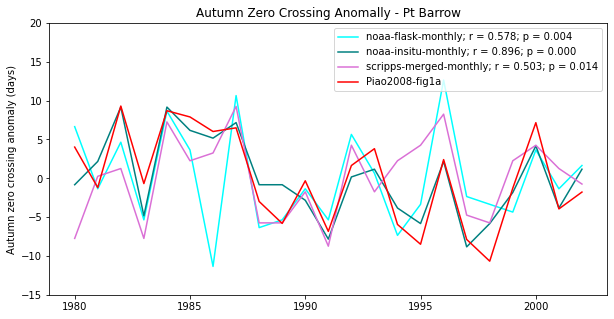

In [30]:
year_beg=1980
year_end=2002
yccg = [yccg_brw_f_m_no, yccg_brw_i_m_no, yccg_brw_m_m_sc]
labels = ['noaa-flask-monthly', 'noaa-insitu-monthly', 'scripps-merged-monthly']
fig1a = brw_piao_fig1a
colors = [col_0, col_1, col_2, col_3]

for i in range(len(yccg)):

    ccg_y = yccg[i]
    # Get the ccg data
    azc = ccg_y['tcu_doy'].loc[ccg_y['year'].between(year_beg, year_end)]
    azc.loc[azc < 150] = azc.loc[azc < 150] + 365
    years = ccg_y['year'].loc[ccg_y['year'].between(year_beg, year_end)]

    # Calculate anomalies
    azc_ano = azc - azc.mean()

    xy = pd.DataFrame({'year': years, 'azc_ano': azc_ano.to_numpy()})
    xy = pd.merge(xy,fig1a, on='year')

    reg = stats.linregress(xy['azc_ano'], xy['azc_ano_fig1a'])
    r_val = "r = {:.3f}".format(reg.rvalue)
    p_val = "p = {:.3f}".format(reg.pvalue)

    # Plot the time series
    plt.plot(years, xy['azc_ano'], '-', color=colors[i], label=labels[i]+'; '+r_val+'; '+p_val)
    plt.ylabel("Autumn zero crossing anomaly (days)")
    plt.ylim([-15, 20])
    # plt.text(0.5, 0.95, r_val+'; '+p_val, transform=ax.transAxes)

plt.rcParams['figure.figsize'] = [12, 5]
plt.plot(years, xy['azc_ano_fig1a'], '-', color='red', label='Piao2008-fig1a')
plt.title(label='Autumn Zero Crossing Anomally - Pt Barrow')
plt.legend(loc='upper right')
plt.show()